In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#We can ovserve that some values of diffferent column has values zero which is wrong so we have to handle that
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

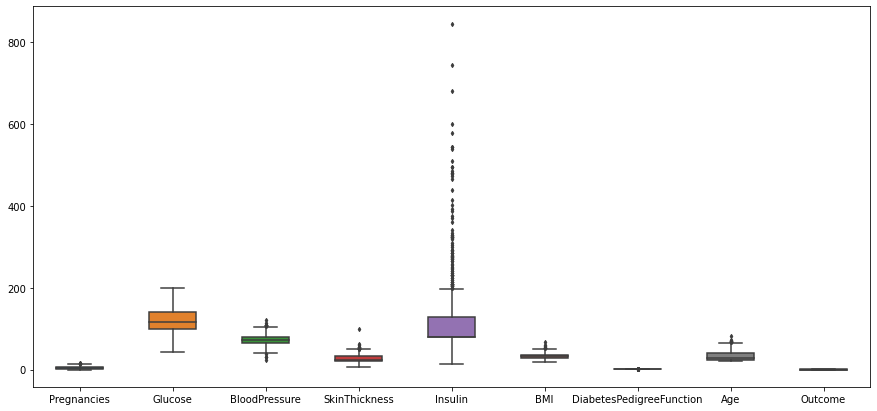

In [11]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
import pickle
# Standard-Scaler
def scaling(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    file=open('scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled

In [15]:
X_train_scaled,X_test_scaled=scaling(X_train,X_test)

<AxesSubplot:>

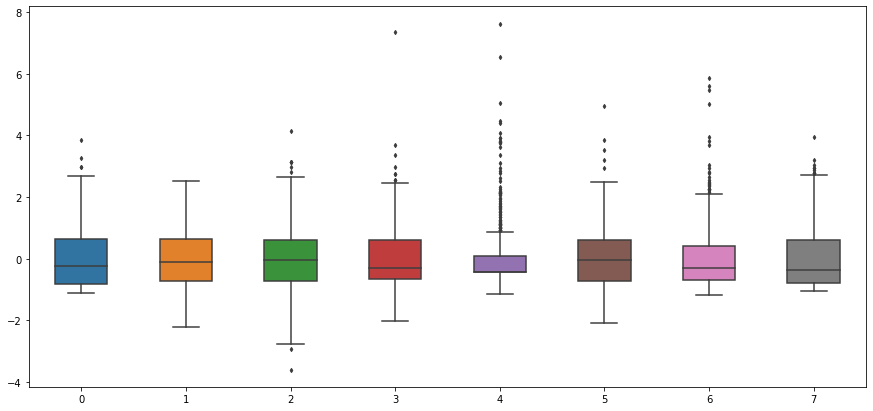

In [16]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=X_train_scaled,width=0.5,ax=ax,fliersize=3)

## Logrithmic Regression

In [17]:
model=LogisticRegression()

In [18]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [19]:
y_predict=model.predict(X_test_scaled)

In [20]:
print(accuracy_score(y_predict,y_test))

0.796875


## Hyperparameter Tuning

In [21]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameter={'penalty':('l1', 'l2', 'elasticnet', None),
           'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
           'C':np.logspace(-3,3,7)}
clf=GridSearchCV(estimator=model,param_grid=parameter,cv=10,scoring='accuracy')

In [22]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')},
             scoring='accuracy')

In [23]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
clf.best_score_

0.763793103448276

In [25]:
y_pred=clf.predict(X_test_scaled)

In [26]:
con_mat=confusion_matrix(y_test,y_pred)

In [27]:
con_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [28]:
true_positive=con_mat[0][0]
false_positive=con_mat[0][1]
false_negative=con_mat[1][0]
true_positive=con_mat[1][1]

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       143
           1       0.58      0.73      0.65        49

    accuracy                           0.80       192
   macro avg       0.74      0.78      0.75       192
weighted avg       0.82      0.80      0.80       192



In [30]:
file=open('model.pkl','wb')
pickle.dump(clf,file)
file.close()

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt=DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
from sklearn import tree

[Text(0.5564678284182306, 0.975, 'x[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.24296246648793565, 0.925, 'x[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(0.10388739946380697, 0.875, 'x[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(0.032171581769437, 0.825, 'x[0] <= 7.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.021447721179624665, 0.775, 'x[6] <= 0.672\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.010723860589812333, 0.725, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.032171581769437, 0.725, 'x[5] <= 23.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.021447721179624665, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04289544235924933, 0.675, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.04289544235924933, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17560321715817695, 0.825, 'x[1] <= 127.5\ngini = 0.324\nsamples = 128\nvalue = [102, 2

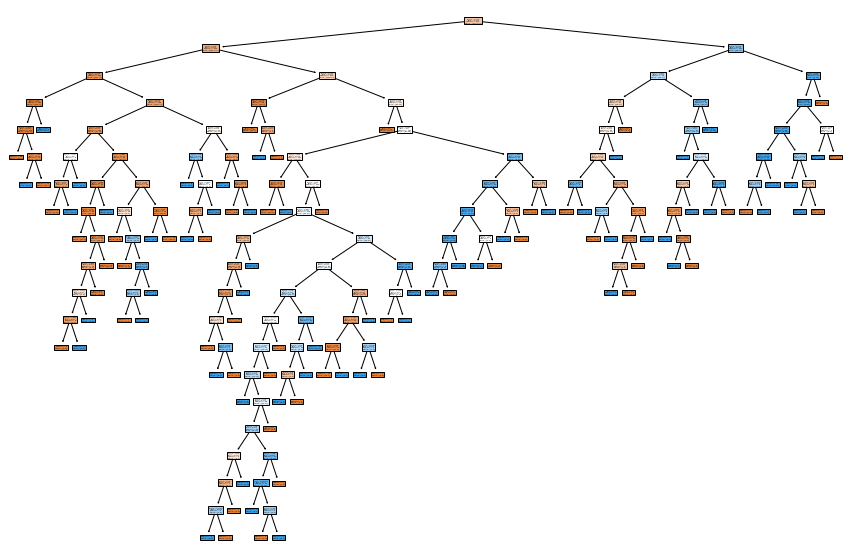

In [37]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [38]:
y_pred=dt.predict(X_test)

In [40]:
print(accuracy_score(y_pred,y_test))

0.7604166666666666


In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       126
           1       0.66      0.62      0.64        66

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



## Hyperparameter Tuning

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
parameters={'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
           'max_depth':[5,7,8,9,10,11,12,13,14,15],
           'max_features':['auto','sqrt','log2']}

In [46]:
treeclf=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=5,scoring='accuracy')

In [47]:
treeclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
treeclf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'random'}

In [49]:
treeclf.best_score_

0.7326386806596702

In [50]:
y_pred=treeclf.predict(X_test)

In [51]:
print(accuracy_score(y_pred,y_test))

0.6927083333333334


In [52]:
score=accuracy_score(y_pred,y_test)
print(score)
report=classification_report(y_pred,y_test)
print(report)

0.6927083333333334
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       143
           1       0.42      0.53      0.47        49

    accuracy                           0.69       192
   macro avg       0.62      0.64      0.63       192
weighted avg       0.72      0.69      0.70       192



In [53]:
from imblearn.ensemble import BalancedBaggingClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [54]:
score=accuracy_score(preds,y_test)
print(score)
report=classification_report(preds,y_test)
print(report)

0.7552083333333334
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       145
           1       0.50      0.66      0.57        47

    accuracy                           0.76       192
   macro avg       0.69      0.72      0.70       192
weighted avg       0.78      0.76      0.77       192

